**Integrantes**

###Edwin Alava
###Damian Arias
###Paola Torres
###Cristhian Vega
###Sulay Camaton
###Freddy Rosember
###Eduardo Moreira
###Gregori Amagualla
###Andrea Villalta
###Ariel Ramos





#**Metodos de busqueda BFS,DFS y A***

**GRAFO PARA DFS, BFS y A***     


Un grafo consiste en un conjunto de nodos y un conjunto de arcos dirigidos entre nodos. La idea es encontrar una ruta a lo largo de estos arcos desde el nodo de inicio a un nodo objetivo:


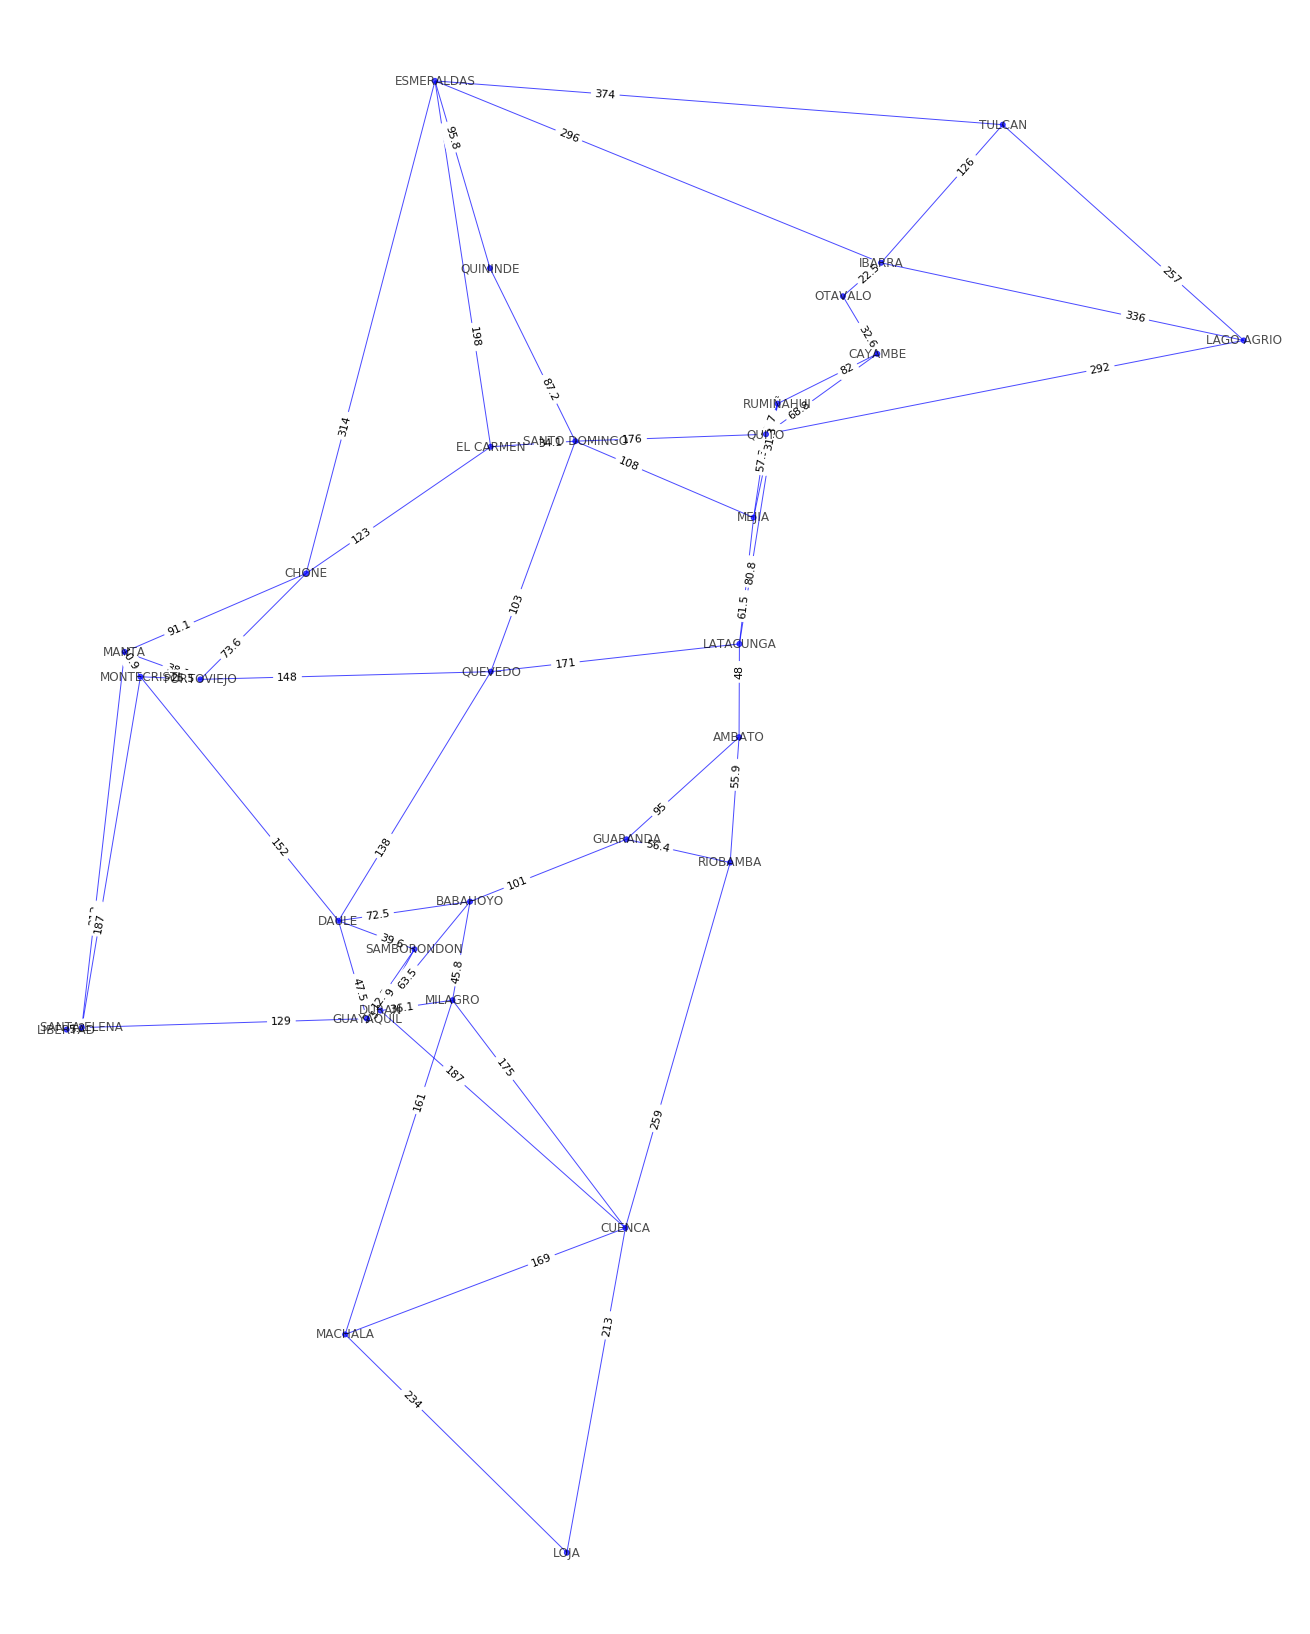

In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians 
graphCityEC = [
			   {'city':'GUAYAQUIL' , 'lat':-2.1961601, 'long':-79.8862076, 'neighbours':[{'neighbour':'DURAN','cost':9.5},{'neighbour':'SAMBORONDON','cost':12.3},{'neighbour':'DAULE','cost':47.5},{'neighbour':'SANTA ELENA','cost':129}]},
			   {'city':'DURAN' , 'lat':-2.169004, 'long':-79.839761, 'neighbours':[{'neighbour':'GUAYAQUIL','cost':9.5},{'neighbour':'SAMBORONDON','cost':9},{'neighbour':'MILAGRO','cost':36.1},{'neighbour':'BABAHOYO','cost':63.5},{'neighbour':'CUENCA','cost':187}]},
			   {'city':'BABAHOYO' , 'lat':-1.80217, 'long':-79.5344315, 'neighbours':[{'neighbour':'DURAN','cost':63.5},{'neighbour':'MILAGRO','cost':45.8},{'neighbour':'GUARANDA','cost':101},{'neighbour':'DAULE','cost':72.5}]},
			   {'city':'PORTOVIEJO' , 'lat':-1.05458, 'long':-80.4544525, 'neighbours':[{'neighbour':'MANTA','cost':38.1},{'neighbour':'CHONE','cost':73.6},{'neighbour':'MONTECRISTI','cost':25.5},{'neighbour':'QUEVEDO','cost':148}]},
			   {'city':'MANTA' , 'lat':-0.96212, 'long':-80.7127075, 'neighbours':[{'neighbour':'MONTECRISTI','cost':10.9},{'neighbour':'SANTA ELENA','cost':212},{'neighbour':'PORTOVIEJO','cost':38.1},{'neighbour':'CHONE','cost':91.1}]},
			   {'city':'QUEVEDO' , 'lat':-1.02863, 'long':-79.4635162, 'neighbours':[{'neighbour':'LATACUNGA','cost':171},{'neighbour':'SANTO DOMINGO','cost':103},{'neighbour':'PORTOVIEJO','cost':148},{'neighbour':'DAULE','cost':138}]},
			   {'city':'MILAGRO' , 'lat':-2.1340401, 'long':-79.5941467, 'neighbours':[{'neighbour':'DURAN','cost':36.1},{'neighbour':'MACHALA','cost':161},{'neighbour':'BABAHOYO','cost':45.8},{'neighbour':'CUENCA','cost':175}]},
			   {'city':'SANTA ELENA' , 'lat':-2.2262199, 'long':-80.8587265, 'neighbours':[{'neighbour':'LIBERTAD','cost':5.2},{'neighbour':'MANTA','cost':212},{'neighbour':'GUAYAQUIL','cost':129},{'neighbour':'MONTECRISTI','cost':187}]},
			   {'city':'SAMBORONDON' , 'lat':-1.96276, 'long':-79.7240219, 'neighbours':[{'neighbour':'GUAYAQUIL','cost':12.3},{'neighbour':'DURAN','cost':9},{'neighbour':'DAULE','cost':39.6}]},
			   {'city':'DAULE' , 'lat':-1.8667, 'long':-79.9833, 'neighbours':[{'neighbour':'SAMBORONDON','cost':39.6},{'neighbour':'GUAYAQUIL','cost':47.5},{'neighbour':'MONTECRISTI','cost':152},{'neighbour':'QUEVEDO','cost':138},{'neighbour':'BABAHOYO','cost':72.5}]},
			   {'city':'MONTECRISTI' , 'lat':-1.04576, 'long':-80.6588898, 'neighbours':[{'neighbour':'SANTA ELENA','cost':187},{'neighbour':'MANTA','cost':10.9},{'neighbour':'PORTOVIEJO','cost':25.5},{'neighbour':'DAULE','cost':152}]},
			   {'city':'CHONE' , 'lat':-0.69819, 'long':-80.0936127, 'neighbours':[{'neighbour':'PORTOVIEJO','cost':73.6},{'neighbour':'EL CARMEN','cost':123},{'neighbour':'MANTA','cost':91.1},{'neighbour':'ESMERALDAS','cost':314}]},
			   {'city':'QUININDE' , 'lat':0.329077, 'long':-79.466411, 'neighbours':[{'neighbour':'ESMERALDAS','cost':95.8},{'neighbour':'SANTO DOMINGO','cost':87.2}]},
			   {'city':'EL CARMEN' , 'lat':-0.271892, 'long':-79.463979, 'neighbours':[{'neighbour':'SANTO DOMINGO','cost':34.1},{'neighbour':'CHONE','cost':123},{'neighbour':'ESMERALDAS','cost':198}]},
			   {'city':'LIBERTAD' , 'lat':-2.233, 'long':-80.9103928, 'neighbours':[{'neighbour':'SANTA ELENA','cost':5.2}]},
			   {'city':'LAGO AGRIO' , 'lat':0.086, 'long':-76.8952789, 'neighbours':[{'neighbour':'QUITO','cost':292},{'neighbour':'TULCAN','cost':257},{'neighbour':'IBARRA','cost':336}]},
			   {'city':'AMBATO' , 'lat':-1.2490799, 'long':-78.6167526, 'neighbours':[{'neighbour':'LATACUNGA','cost':48},{'neighbour':'RIOBAMBA','cost':55.9},{'neighbour':'GUARANDA','cost':95}]},
			   {'city':'CAYAMBE' , 'lat':0.04084, 'long':-78.1452408, 'neighbours':[{'neighbour':'OTAVALO','cost':32.6},{'neighbour':'QUITO','cost':68.8},{'neighbour':'RUMIÑAHUI','cost':82}]},
			   {'city':'CUENCA' , 'lat':-2.9005499, 'long':-79.0045319, 'neighbours':[{'neighbour':'LOJA','cost':213},{'neighbour':'MILAGRO','cost':175},{'neighbour':'DURAN','cost':187},{'neighbour':'MACHALA','cost':169},{'neighbour':'RIOBAMBA','cost':259}]},
			   {'city':'GUARANDA' , 'lat':-1.59263, 'long':-79.0009766, 'neighbours':[{'neighbour':'RIOBAMBA','cost':56.4},{'neighbour':'BABAHOYO','cost':101},{'neighbour':'AMBATO','cost':95}]},
			   {'city':'IBARRA' , 'lat':0.347132, 'long':-78.132329, 'neighbours':[{'neighbour':'TULCAN','cost':126},{'neighbour':'ESMERALDAS','cost':296},{'neighbour':'OTAVALO','cost':22.5},{'neighbour':'LAGO AGRIO','cost':336}]},
			   {'city':'LATACUNGA' , 'lat':-0.93521, 'long':-78.6155396, 'neighbours':[{'neighbour':'QUEVEDO','cost':171},{'neighbour':'AMBATO','cost':48},{'neighbour':'MEJIA','cost':61.5},{'neighbour':'RUMIÑAHUI','cost':80.8}]},
			   {'city':'LOJA' , 'lat':-3.99313, 'long':-79.2042236, 'neighbours':[{'neighbour':'MACHALA','cost':234},{'neighbour':'CUENCA','cost':213}]},
			   {'city':'MACHALA' , 'lat':-3.25861, 'long':-79.9605331, 'neighbours':[{'neighbour':'CUENCA','cost':169},{'neighbour':'LOJA','cost':234},{'neighbour':'MILAGRO','cost':161}]},
			   {'city':'MEJIA' , 'lat':-0.51011, 'long':-78.5671234, 'neighbours':[{'neighbour':'LATACUNGA','cost':61.5},{'neighbour':'QUITO','cost':57.3},{'neighbour':'RUMIÑAHUI','cost':31.3},{'neighbour':'SANTO DOMINGO','cost':108}]},
			   {'city':'OTAVALO' , 'lat':0.23457, 'long':-78.2624817, 'neighbours':[{'neighbour':'IBARRA','cost':22.5},{'neighbour':'CAYAMBE','cost':32.6}]},
			   {'city':'QUITO' , 'lat':-0.22985, 'long':-78.5249481, 'neighbours':[{'neighbour':'CAYAMBE','cost':68.8},{'neighbour':'LAGO AGRIO','cost':292},{'neighbour':'RUMIÑAHUI','cost':26.7},{'neighbour':'MEJIA','cost':57.3},{'neighbour':'SANTO DOMINGO','cost':176}]},
			   {'city':'RIOBAMBA' , 'lat':-1.67098, 'long':-78.6471176, 'neighbours':[{'neighbour':'CUENCA','cost':259},{'neighbour':'AMBATO','cost':55.9},{'neighbour':'GUARANDA','cost':56.4}]},
			   {'city':'RUMIÑAHUI' , 'lat':-0.126732, 'long':-78.485368, 'neighbours':[{'neighbour':'LATACUNGA','cost':80.8},{'neighbour':'CAYAMBE','cost':82},{'neighbour':'MEJIA','cost':31.3},{'neighbour':'QUITO','cost':26.7}]},
			   {'city':'TULCAN' , 'lat':0.81187, 'long':-77.7172699, 'neighbours':[{'neighbour':'ESMERALDAS','cost':374},{'neighbour':'LAGO AGRIO','cost':257},{'neighbour':'IBARRA','cost':126}]},
			   {'city':'SANTO DOMINGO' , 'lat':-0.25305, 'long':-79.1753616, 'neighbours':[{'neighbour':'EL CARMEN','cost':34.1},{'neighbour':'QUEVEDO','cost':103},{'neighbour':'QUININDE','cost':87.2},{'neighbour':'MEJIA','cost':108},{'neighbour':'QUITO','cost':176}]},
			   {'city':'ESMERALDAS' , 'lat':0.9592, 'long':-79.6539688, 'neighbours':[{'neighbour':'QUININDE','cost':95.8},{'neighbour':'TULCAN','cost':374},{'neighbour':'IBARRA','cost':296},{'neighbour':'EL CARMEN','cost':198}]}
               ]
                
def CreateGraph():   
    G = nx.Graph()
    est_abiertos = []  
    for city in graphCityEC:
      if city['city'] not in est_abiertos:
        est_abiertos.append(city['city'])
        for neighbour in city['neighbours']:
          G.add_edge(city['city'], neighbour['neighbour'], weight = neighbour['cost'])
    G.size(weight='weight')
    return G

def DrawPath(G, source, dest):
    est_abiertos = []  
    pos={}
    for city in graphCityEC:
      if city['city'] not in est_abiertos:
        est_abiertos.append(city['city'])      
        pos[city['city']]=[city['long'],city['lat']]
    val_map = {}
    val_map[source] = 'green'
    val_map[dest] = 'red'
    values = [val_map.get(node, 'blue') for node in G.nodes()]
    plt.figure(1,figsize=(18,22.5)) 
    nx.draw(G, pos, with_labels = True,node_size=25, node_color = values, edge_color = 'b' ,width = 1, alpha = 0.7)  #with_labels=true is to show the node number in the output graph    
    edge_labels = dict([((u, v,), d['weight']) for u, v, d in G.edges(data = True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, label_pos = 0.7, font_size = "11") #prints weight on all the edges
    plt.draw()
    #return pos

G= CreateGraph()
DrawPath(G, "", "")

Se realiza un grafo para aquello usaremos la lista de adyacencia. Un método efectivo / elegante para implementar listas de adyacencia en Python es usar diccionarios. Las claves del diccionario representan nodos, los valores tienen una lista de vecinos

In [2]:
def simpleGraph(graph):
    est_abiertos = []
    s_graph={}
    for city in graph:
      neighbours=[]
      if city['city'] not in est_abiertos:
        est_abiertos.append(city['city']) 
        for neighbour in city['neighbours']:    
          neighbours.append(neighbour['neighbour'])   
      s_graph[city['city']]=set(neighbours)
    return s_graph


graph = simpleGraph(graphCityEC)

# ALGORITMO BFS

Se realizó la función BDF para recorrer un grafo y encontrar el camino más corto. Primero, en el caso de la aplicación de la ruta más corta, necesitamos que queue mantenga un registro de las rutas posibles (implementadas como lista de nodos) en lugar de nodos. Segundo, cuando el algoritmo verifica si hay un nodo vecino, debe verificar si el nodo vecino corresponde al nodo objetivo. Si ese es el caso, tenemos una solución y no hay necesidad de seguir explorando el gráfico

In [3]:
# encuentra la ruta más corta entre nodos de un gráfico usando BFS
def bfs_shortest_path(graph, start, goal):
    print('Nodo inicial: ',start)
    print ('Nodo objetivo: ',goal)
    print('\n')
    # hacer un seguimiento de los estados abiertos(nodos explorados)
    est_abiertos = []
    # realizar un seguimiento de todos los caminos que deben comprobarse
    cola = [[start]]
    # retornar la ruta si el inicio es el objetivo
    if start == goal:
        return "Eso fue fácil! Inicio = objetivo"
    # mantenernos en bucle hasta que se hayan verificado todos los caminos posibles
    while cola:
        # Pop el primer camino de la cola
        ruta = cola.pop(0)
        # obtener el último nodo de la ruta
        node = ruta[-1]
        print('Ruta en la cola: ',ruta, ' - Último nodo de la ruta ',node)
        if node not in est_abiertos:
          print(f'Nodo no explorado {node} ')
          hijos = graph[node]
          # Ir a través de todos los nodos vecinos, construir una nueva ruta y empujarlo en la cola
          print('Nodos vecinos de : ',node,' son: ',hijos)
          for hijo in hijos:
              nuevo_camino = list(ruta)
              nuevo_camino.append(hijo)
              cola.append(nuevo_camino)
              print('Nuevas Rutas', nuevo_camino)
              # retornar ruta si el vecino es el objetivo
              if hijo == goal:                  
                  return 'Camino Escogido: ', nuevo_camino
          print('No se encontro Objetivo')
          print('Nuevas rutas agregada a la cola: ',cola)
          print('-------------------------------------------------------------------------------------------------------------')
          # marca el nodo como explorado
          est_abiertos.append(node)
        else:
            print(f'Ya ha sido explorado nodo: {node}')
    # En caso de que no haya ruta entre los 2 nodos.
    return "Lo siento, pero no existe una ruta de conexión..."

In [4]:
graph_valid = {'1': ['2', '3'],
         '2': ['4', '6'],
         '3': ['4', '5', '7'],
         '4': ['5'],
         '5': ['6', '7'],
         '6': ['7', '8'],
         '7': ['8']}

**Validación BFS**
##Grafo
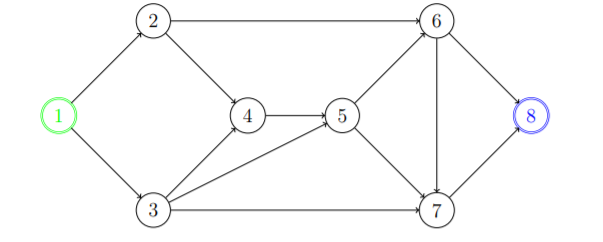

In [5]:
bfs_shortest_path(graph_valid,'1','8')

Nodo inicial:  1
Nodo objetivo:  8


Ruta en la cola:  ['1']  - Último nodo de la ruta  1
Nodo no explorado 1 
Nodos vecinos de :  1  son:  ['2', '3']
Nuevas Rutas ['1', '2']
Nuevas Rutas ['1', '3']
No se encontro Objetivo
Nuevas rutas agregada a la cola:  [['1', '2'], ['1', '3']]
-------------------------------------------------------------------------------------------------------------
Ruta en la cola:  ['1', '2']  - Último nodo de la ruta  2
Nodo no explorado 2 
Nodos vecinos de :  2  son:  ['4', '6']
Nuevas Rutas ['1', '2', '4']
Nuevas Rutas ['1', '2', '6']
No se encontro Objetivo
Nuevas rutas agregada a la cola:  [['1', '3'], ['1', '2', '4'], ['1', '2', '6']]
-------------------------------------------------------------------------------------------------------------
Ruta en la cola:  ['1', '3']  - Último nodo de la ruta  3
Nodo no explorado 3 
Nodos vecinos de :  3  son:  ['4', '5', '7']
Nuevas Rutas ['1', '3', '4']
Nuevas Rutas ['1', '3', '5']
Nuevas Rutas ['1', '3', '7']
No se

('Camino Escogido: ', ['1', '2', '6', '8'])

**PRUEBA 1 BFS**

En la  prueba 1 se puede observar que el nodo de inicio es SANTO DOMINGO recorre el grafo en anchura y encuentra el camino más corto tal que queue va registrando las rutas posibles en lugar de nodos. Cuando el algoritmo verifica si hay un nodo vecino, debe verificar si el nodo vecino corresponde al nodo objetivo. Esta prueba el objetivo de SANTA ELENA si se encuentra ya no hay necesidad de seguir explorando el gráfo.

In [6]:
bfs_shortest_path(graph,'SANTO DOMINGO','SANTA ELENA')

Nodo inicial:  SANTO DOMINGO
Nodo objetivo:  SANTA ELENA


Ruta en la cola:  ['SANTO DOMINGO']  - Último nodo de la ruta  SANTO DOMINGO
Nodo no explorado SANTO DOMINGO 
Nodos vecinos de :  SANTO DOMINGO  son:  {'QUEVEDO', 'QUITO', 'QUININDE', 'MEJIA', 'EL CARMEN'}
Nuevas Rutas ['SANTO DOMINGO', 'QUEVEDO']
Nuevas Rutas ['SANTO DOMINGO', 'QUITO']
Nuevas Rutas ['SANTO DOMINGO', 'QUININDE']
Nuevas Rutas ['SANTO DOMINGO', 'MEJIA']
Nuevas Rutas ['SANTO DOMINGO', 'EL CARMEN']
No se encontro Objetivo
Nuevas rutas agregada a la cola:  [['SANTO DOMINGO', 'QUEVEDO'], ['SANTO DOMINGO', 'QUITO'], ['SANTO DOMINGO', 'QUININDE'], ['SANTO DOMINGO', 'MEJIA'], ['SANTO DOMINGO', 'EL CARMEN']]
-------------------------------------------------------------------------------------------------------------
Ruta en la cola:  ['SANTO DOMINGO', 'QUEVEDO']  - Último nodo de la ruta  QUEVEDO
Nodo no explorado QUEVEDO 
Nodos vecinos de :  QUEVEDO  son:  {'DAULE', 'SANTO DOMINGO', 'PORTOVIEJO', 'LATACUNGA'}
Nuevas Rut

('Camino Escogido: ',
 ['SANTO DOMINGO', 'QUEVEDO', 'DAULE', 'GUAYAQUIL', 'SANTA ELENA'])

**PRUEBA 2 BFS**

En la prueba 2 se puede observar que el nodo de inicio es SANTO DOMINGO recorre el grafo en anchura y encuentra el camino más corto tal que queue va registrando las rutas posibles en lugar de nodos. Cuando el algoritmo verifica si hay un nodo vecino, debe verificar si el nodo vecino corresponde al nodo objetivo. Esta prueba el objetivo de OTAVALO si se encuentra ya no hay necesidad de seguir explorando el gráfo.

In [7]:
bfs_shortest_path(graph,'SANTO DOMINGO','OTAVALO')

Nodo inicial:  SANTO DOMINGO
Nodo objetivo:  OTAVALO


Ruta en la cola:  ['SANTO DOMINGO']  - Último nodo de la ruta  SANTO DOMINGO
Nodo no explorado SANTO DOMINGO 
Nodos vecinos de :  SANTO DOMINGO  son:  {'QUEVEDO', 'QUITO', 'QUININDE', 'MEJIA', 'EL CARMEN'}
Nuevas Rutas ['SANTO DOMINGO', 'QUEVEDO']
Nuevas Rutas ['SANTO DOMINGO', 'QUITO']
Nuevas Rutas ['SANTO DOMINGO', 'QUININDE']
Nuevas Rutas ['SANTO DOMINGO', 'MEJIA']
Nuevas Rutas ['SANTO DOMINGO', 'EL CARMEN']
No se encontro Objetivo
Nuevas rutas agregada a la cola:  [['SANTO DOMINGO', 'QUEVEDO'], ['SANTO DOMINGO', 'QUITO'], ['SANTO DOMINGO', 'QUININDE'], ['SANTO DOMINGO', 'MEJIA'], ['SANTO DOMINGO', 'EL CARMEN']]
-------------------------------------------------------------------------------------------------------------
Ruta en la cola:  ['SANTO DOMINGO', 'QUEVEDO']  - Último nodo de la ruta  QUEVEDO
Nodo no explorado QUEVEDO 
Nodos vecinos de :  QUEVEDO  son:  {'DAULE', 'SANTO DOMINGO', 'PORTOVIEJO', 'LATACUNGA'}
Nuevas Rutas [

('Camino Escogido: ', ['SANTO DOMINGO', 'QUITO', 'CAYAMBE', 'OTAVALO'])

# ALGORITMO DSF

Se realizó la función dfs la cual implementa una búsqueda en profundidad. Su funcionamiento consiste en ir expandiendo todos y cada uno de los nodos que va localizando, de forma recurrente, en un camino concreto. Cuando ya no quedan más nodos que visitar en dicho camino, regresa de modo que repite el mismo proceso con cada uno de los nodos vecinos ya procesado.

In [8]:
def dfs_paths(graph, start, goal):
    print('Nodo inicial: ',start)
    print ('Nodo objetivo: ',goal)
    stack = [(start, [start])]
    # retornar la ruta si el inicio es el objetivo
    if start == goal:
        return "Eso fue fácil! Inicio = objetivo"
    while stack:
        # Pop el ultimo camino de la cola
        (vertex, path) = stack.pop()
        path_list=set(path)  
        print('Ruta en la pila: ',path, ' - Último nodo de la ruta ',vertex)      
        for next in set(graph[vertex]) - path_list:            
            if next == goal:
                print('Camino encontrado................\n\n')
                return print('Camino Escogido: ',path + [next])
            else:
                print('Nodos vecinos de : ',vertex,' son: ',next)
                stack.append((next, path + [next]))
        print('No se encontro Objetivo')
        print('Próximo nodo a explorar:',next)
        print('-------------------------------------------------------------------------------------------------------------')
    # En caso de que no haya ruta entre los 2 nodos.
    return "Lo siento, pero no existe una ruta de conexión..."

**Validación DFS**
##Grafo
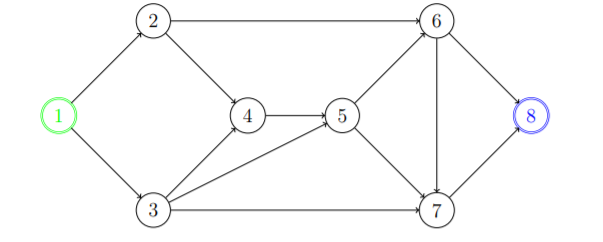


In [9]:
dfs_paths(graph_valid, '1', '8')

Nodo inicial:  1
Nodo objetivo:  8
Ruta en la pila:  ['1']  - Último nodo de la ruta  1
Nodos vecinos de :  1  son:  2
Nodos vecinos de :  1  son:  3
No se encontro Objetivo
Próximo nodo a explorar: 3
-------------------------------------------------------------------------------------------------------------
Ruta en la pila:  ['1', '3']  - Último nodo de la ruta  3
Nodos vecinos de :  3  son:  4
Nodos vecinos de :  3  son:  7
Nodos vecinos de :  3  son:  5
No se encontro Objetivo
Próximo nodo a explorar: 5
-------------------------------------------------------------------------------------------------------------
Ruta en la pila:  ['1', '3', '5']  - Último nodo de la ruta  5
Nodos vecinos de :  5  son:  7
Nodos vecinos de :  5  son:  6
No se encontro Objetivo
Próximo nodo a explorar: 6
-------------------------------------------------------------------------------------------------------------
Ruta en la pila:  ['1', '3', '5', '6']  - Último nodo de la ruta  6
Nodos vecinos de :  6  

**PRUEBA 1 DFS**

En la prueba 1 se puede visualizar que el nodo de inicio es ORADEA este a diferencia del BFS recorre el grafo en profundidad va expandiendo todos y cada uno de los nodos que va localizando de forma repetitivo en un camino en concreto. Si ya no quedan mas nodos que visitar por ese camino, se regresa al anterior y este vuelve a repite el mismo proceso con todos los nodos vecinos ya explorado.


In [10]:
  dfs_paths(graph,'SANTO DOMINGO','SANTA ELENA')

Nodo inicial:  SANTO DOMINGO
Nodo objetivo:  SANTA ELENA
Ruta en la pila:  ['SANTO DOMINGO']  - Último nodo de la ruta  SANTO DOMINGO
Nodos vecinos de :  SANTO DOMINGO  son:  QUEVEDO
Nodos vecinos de :  SANTO DOMINGO  son:  QUININDE
Nodos vecinos de :  SANTO DOMINGO  son:  QUITO
Nodos vecinos de :  SANTO DOMINGO  son:  MEJIA
Nodos vecinos de :  SANTO DOMINGO  son:  EL CARMEN
No se encontro Objetivo
Próximo nodo a explorar: EL CARMEN
-------------------------------------------------------------------------------------------------------------
Ruta en la pila:  ['SANTO DOMINGO', 'EL CARMEN']  - Último nodo de la ruta  EL CARMEN
Nodos vecinos de :  EL CARMEN  son:  CHONE
Nodos vecinos de :  EL CARMEN  son:  ESMERALDAS
No se encontro Objetivo
Próximo nodo a explorar: ESMERALDAS
-------------------------------------------------------------------------------------------------------------
Ruta en la pila:  ['SANTO DOMINGO', 'EL CARMEN', 'ESMERALDAS']  - Último nodo de la ruta  ESMERALDAS
Nodos

**PRUEBA 2 DFS**

En la prueba 2 se puede visualizar que el nodo de inicio es HIRSOVA este a diferencia del BFS recorre el grafo en profundidad va expandiendo todos y cada uno de los nodos que va localizando de forma repetitivo en un camino en concreto. Si ya no quedan mas nodos que visitar por ese camino, se regresa al anterior y este vuelve a repite el mismo proceso con todos los nodos vecinos ya explorado.


In [11]:
  dfs_paths(graph,'SANTO DOMINGO','OTAVALO')

Nodo inicial:  SANTO DOMINGO
Nodo objetivo:  OTAVALO
Ruta en la pila:  ['SANTO DOMINGO']  - Último nodo de la ruta  SANTO DOMINGO
Nodos vecinos de :  SANTO DOMINGO  son:  QUEVEDO
Nodos vecinos de :  SANTO DOMINGO  son:  QUININDE
Nodos vecinos de :  SANTO DOMINGO  son:  QUITO
Nodos vecinos de :  SANTO DOMINGO  son:  MEJIA
Nodos vecinos de :  SANTO DOMINGO  son:  EL CARMEN
No se encontro Objetivo
Próximo nodo a explorar: EL CARMEN
-------------------------------------------------------------------------------------------------------------
Ruta en la pila:  ['SANTO DOMINGO', 'EL CARMEN']  - Último nodo de la ruta  EL CARMEN
Nodos vecinos de :  EL CARMEN  son:  CHONE
Nodos vecinos de :  EL CARMEN  son:  ESMERALDAS
No se encontro Objetivo
Próximo nodo a explorar: ESMERALDAS
-------------------------------------------------------------------------------------------------------------
Ruta en la pila:  ['SANTO DOMINGO', 'EL CARMEN', 'ESMERALDAS']  - Último nodo de la ruta  ESMERALDAS
Nodos vec

## **ALGORITMO DE BUSQUEDA A***

Primero se realizará la representación de un problema de búsqueda, la cual un problema de búsqueda consiste en: 
 	un nodo de inicio (start):
  
*   una función de vecinos (neighbors) que da los vecinos (neighbors) de un nodo
*   una especificación de un objetivo
*   una función heurística (opcional).

Los métodos deben ser sobrescritos para definir un problema de búsqueda:

In [12]:
class Search_problem(object):
    """Un problema de búsqueda consiste de:
    * un nodo de inicio (start)
    * una funcioón de vecinos (neighbors) que da los vecinos (neighbors) de un nodo
    * una especificación de un objetivo
    * una función heurística (opcional).
    Los métodos deben ser sobrescritos para definir un problema de búsqueda."""

    def start_node(self):
        """retorna el node inicial (start)"""
        raise NotImplementedError("start_node")   # abstract method
    
    def is_goal(self,node):
        """es True si nodo es un objetivo"""
        raise NotImplementedError("is_goal")   # abstract method

    def neighbors(self,node):
        """retorna una lista de los  arcos para los vecinos (neighbors) de un nodo"""
        raise NotImplementedError("neighbors")   # abstract method

    def heuristic(self,n):
        """Da el valor heuristico del nodo n.
        Retorna 0 si no se sobrescribe."""
        return 0

Luego tenemos un arco que tiene un nodo from_node y un nodo to_node y un costo (no negativo):

In [13]:
class Arc(object):
    """Un arco tiene un nodo from_node y un nodo to_node y un costo (no-negativo)"""
    def __init__(self, from_node, to_node, cost=1, action=None):
        assert cost >= 0, ("Costo no puede ser negativo para"+
                           str(from_node)+"->"+str(to_node)+", cost: "+str(cost))
        self.from_node = from_node
        self.to_node = to_node
        self.action = action
        self.cost=cost

    def __repr__(self):
        """Retorna un  string de la representación de un arco"""
        if self.action:
            return str(self.from_node)+" --"+str(self.action)+"--> "+str(self.to_node)
        else:
            return str(self.from_node)+" --> "+str(self.to_node)            

En la clase de representación explicita del grafo de búsqueda un problema de búsqueda consiste de:
*  una lista o set de nodos: nodes
*	una lista o set de arcos: arcs
*	un nodo inicial (start):  start=None
*	una lista o set de nodos objetivos: goals=set()
* un diccionario que mapea cada nodo en su valor heurístico: hmap={}

Se define un problema de búsqueda, necesitamos definir el nodo de inicio, el predicado objetivo, la función de los vecinos y la función heurística. Lo siguiente se usa para la implementación de búsqueda (DFS) primero en profundidad a continuación 

In [14]:
class Search_problem_from_explicit_graph(Search_problem):
    """Un problema de búsqueda consiste de:
    * una lista o set de nodos: nodes
    * una lista o set de arcos: arcs
    * un nodo inicial (start):  start=None
    * una lista o set de nodos objetivos: goals=set()
    * un diccionario que mapea cada nodo en su valor heurístico: hmap={}
    """
  

    def __init__(self, nodes, arcs, start=None, goals=set(), hmap={}):
        self.neighs = {}
        self.nodes = nodes
               

        for node in nodes:
            self.neighs[node]=[]
        self.arcs = arcs
        for arc in arcs:
            self.neighs[arc.from_node].append(arc)
        self.start = start
        self.goals = goals
        self.hmap = hmap

    def start_node(self):
        """retorna el nodo inicial (start)"""
        return self.start
    
    def is_goal(self,node):
        """es True so nodo es un objetivo (goal)"""
        return node in self.goals
    
    def get_goals(self):
        """retorna (goal)"""
        return self.goals
    
    def neighbors(self,node):
        """retorna los vecinos (neighbors) de un nodo"""
        return self.neighs[node]

    def heuristic(self,node):
        """Dado el valor heurístico de un nodo n.
        Retorna 0 si no sobrescribir en el hmap."""
        if node in self.hmap:
            return self.hmap[node]
        else:
            return 0
        
    def __repr__(self):
        """retorna un string de la representación del problema de búsqueda"""
        res=""
        for arc in self.arcs:
            res += str(arc)+".  "
        return res

    def neighbor_nodes(self,node):
        """retorna un iterador sobre los vecinos (neighbors) de un nodo"""
        return (path.to_node for path in self.neighs[node])

La cual un buscador devolvera una ruta desde el nodo de inicio a un nodo objetivo. Se utiliza una representacion alternativa en terminos de una estructura de datos recursiva que puede compartir subpartes. Un camino es:
* un nodo (que representa una ruta de longitud 0) o
*	una ruta, inicial y un arco, donde el nodo desde el arco es el nodo en el final de la inicial.

Estos casos se distinguen en el siguiente código al tener arc = None si la ruta tiene una longitud de 0, en cuyo caso el nodo inicial (start) es el nodo de la ruta. 


In [15]:
class Path(object):
    """Una ruta (path) es ya sea un nodo o una trayectoria seguida por un arco"""
    
    def __init__(self,initial,arc=None):
        """inicial es un nodo (en cuyo caso el arco es None) o
        una ruta (path) (en cuyo caso arco es un objeto de tipo arco)"""
        self.initial = initial
        self.arc=arc
        if arc is None:
            self.cost=0
        else:
            self.cost = initial.cost + arc.cost

    def end(self):
        """retorna el nodo en el fin de la ruta (path)"""
        if self.arc is None:
            return self.initial
        else:
            return self.arc.to_node

    def nodes(self):
        """enumera los nodos para la ruta.
        Esto comienza al final y enumera los nodos en la ruta hacia atrás."""
        current = self
        while current.arc is not None:
            yield current.arc.to_node
            current = current.initial
        yield current.initial

    def initial_nodes(self):
        """enumera los nodos para la ruta antes del nodo final.
        Esto comienza al final y enumera los nodos en la ruta hacia atrás."""
        if self.arc is not None:
            for nd in self.initial.nodes(): yield nd     # could be "yield from"
        
    def __repr__(self):
        """retorna un string de representación de una ruta (path)"""
        if self.arc is None:
            return str(self.initial)
        elif self.arc.action:
            return (str(self.initial)+"\n   --"+str(self.arc.action)
                    +"--> "+str(self.arc.to_node))
        else:
            return str(self.initial)+" --> "+str(self.arc.to_node)

Se construye un objeto Searcher para el problema y luego pedir repetidamente la siguiente ruta utilizando la búsqueda. Si no hay más caminos, se devuelve None

In [16]:
class Displayable(object):
    """Class that uses 'display'.
    The amount of detail is controlled by max_display_level
    """
    max_display_level = 1   # can be overridden in subclasses

    def display(self,level, *args, **nargs):
        """print the arguments if level is less than or equal to the
        current max_display_level.
        level is an integer.
        the other arguments are whatever arguments print can take.
        """
        if level <= self.max_display_level:
            print(*args, **nargs)  ##if error you are using Python2 not Python3
def visualize(func):
    """A decorator for algorithms that do interactive visualization.
    Ignored here.
    """
    return func

In [17]:
class Searcher(Displayable):
    """retorna un buscador (searcher) para un problema.
    Las Rutas (Paths) pueden ser encontradas por llamadas repetidas a search().
    Esto hace primero la búsqueda de profundidad a menos que se anule
    """    
    def __init__(self, problem):
        """crea un buscador (searcher) desde un problema
        """
        self.problem = problem
        self.initialize_frontier()
        self.num_expanded = 0
        self.add_to_frontier(Path(problem.start_node()),[],self.problem.get_goals())
        super().__init__()

    def initialize_frontier(self):
        self.frontier = []
        
    def empty_frontier(self):
        return self.frontier == []
        
    def add_to_frontier(self,path):
        self.frontier.append(path)
        
    @visualize
    def search(self):
        """retorna (next) path - (siguiente) ruta - desde el nodo inicial (start) de un problema
        a un nodo objetivo (goal). 
        Retorna None si no existe ruta (path).
        """  
        explored_list=[]      
        while not self.empty_frontier():
            
            path = self.frontier.pop()
            if path.end() not in explored_list:
                explored_list.append(path.end())
                print("Expandiendo:",path,"(costo:",path.cost,")")
                self.display(2, "Expandiendo:",path,"(costo:",path.cost,")")
                self.num_expanded += 1
                
                if self.problem.is_goal(path.end()):    # solución encontrada
                    self.display(1, self.num_expanded, "caminos se han ampliado y",
                                len(self.frontier), "rutas (paths) permanecen en la frontera")
                    self.solution = path   # almacena la solución encontrada
                    return path
                else:
                    neighs = self.problem.neighbors(path.end())
                    self.display(3,"Los vecinos (Neighbors) son", neighs)
                    
                    for arc in reversed(neighs):
                        self.add_to_frontier(Path(path,arc),explored_list,self.problem.get_goals())
                    self.display(3,"Frontera:",self.frontier)
                    #print("Frontera:",self.frontier)
                
        self.display(1,"No (más) soluciones. Total de",
                     self.num_expanded,"rutas (paths) expandidas.")

En la clase frontera consiste de una cola (queue) de prioridas (priority) (heap), fronterapq, de triples (value, index, path), dónde:
* 	value es el valor que queremos minimizar (e.g., costo de path + h).
*  index es un índice único para cada elemento
* path es la ruta en la cola (queue)

Tenga en cuenta que la cola de prioridad siempre devuelve el elemento más pequeño

In [18]:
import heapq        

#from searchProblem import Path

class FrontierPQ(object):
    """Una frontera consiste de una cola (queue) de prioridas (priority) (heap), fronterapq, de
       triples (value, index, path), dónde
    * value es el valor que queremos minimizar (e.g., costo de path + h).
    * index es un índice único para cada elemento
    * path es la ruta en la cola (queue)
    Tenga en cuenta que la cola de prioridad siempre devuelve el elemento más pequeño.
    """

    def __init__(self):
        """construye la frontera, inicialmente una cola de prioridad vacía
        """
        self.frontier_index = 0  # el número de elementos que se han añadido a la frontera.
        self.frontierpq = []  # la cola de prioridad de la frontera

    def empty(self):
        """es True si la cola de priority está vacía (empty)"""
        return self.frontierpq == []

    def add(self, path, value):
        """añade una ruta (path) a la cola priority
        value es el valor a ser minimizado"""
        self.frontier_index += 1    # obtener un nuevo índice único
        heapq.heappush(self.frontierpq,(value, -self.frontier_index, path))

    def pop(self):
        """retorna y elimina el camino de la frontera con valor mínimo.
        """
        (_,_,path) = heapq.heappop(self.frontierpq)
        return path 

    def count(self,val):
        """retorna el número de elementos de la frontera con value=val"""
        return sum(1 for e in self.frontierpq if e[0]==val)

    def __repr__(self):
        """string de representación de la frontier"""
        return str([(n,c,str(p)) for (n,c,p) in self.frontierpq])
    
    def __len__(self):
        """longitud (length) de la frontier"""
        return len(self.frontierpq)

    def __iter__(self):
        """iterar a través de a través de los caminos en el frontier"""
        for (_,_,path) in self.frontierpq:
            yield path

Para una búsqueda A∗, la frontera se implementa utilizando la clase FrontierPQ. 

In [19]:
class AStarSearcher(Searcher):
    """retorna un buscador searcher para un problema.
    Las rutas se pueden encontrar llamando repetidamente a search().
    """
    def __init__(self, problem):
        super().__init__(problem)

    def initialize_frontier(self):
        self.frontier = FrontierPQ()

    def empty_frontier(self):
        return self.frontier.empty()

    def add_to_frontier(self,path,exp,goals):
        value = path.cost + self.problem.heuristic(path.end())
        self.frontier.add(path, value)
        if path.end() not in exp:
            """agregar ruta (path) a la frontera con el costo apropiado"""
            ##value = path.cost + self.problem.heuristic(path.end())
            print('Costo del camino',round(path.cost,2),' + Costo de la heurística de: ',path.end(),' es: ',self.problem.heuristic(path.end()),' --> ',round(value,2))
            ##self.frontier.add(path, value)              
            if path.end() in goals:
                print('*-----------------------------------------------------------------------------------')
                print('|> Posible Ruta: ',path,'| Costo del camino',round(path.cost,2))
                print('*-----------------------------------------------------------------------------------')

Utils Wrapper Periodo 55

In [ ]:
def ListCity(graph):
    est_abiertos = []
    arc_city = []
    for city in graph:
      neighbours=[]
      if city['city'] not in est_abiertos:
        est_abiertos.append(city['city'])        
        for neighbour in city['neighbours']:
            arc_city.append(Arc(city['city'],neighbour['neighbour'],neighbour['cost'])) 
    return set(est_abiertos), arc_city

def GetHeuristic(graph,goals):
    
    """ 
    Calcular la distancia de Haversine.

    Parametros
    ---------- 
    origen : tupla de float 
     (lat, long) 
    destina : tupla de float 
     (lat, long) 

    Returns 
    ------- 
    distance : float 

    Examples 
    -------- 
    >>> origen = (-2.1961601, -79.8862076) # Guayaquil 
    >>> destino = (-0.25305, -79.1753616) # Santo Domingo 
    >>> heuristic[city['city']] = round(distance,2)
    230.13	KM
    """ 
    
    print('-----------Heuristic-----------')
    print('Meta: '+goals)
    est_abiertos = []
    heuristic = {}
    # radio aproximado de la tierra en km
    R = 6373.0 
    temp_goal_node=graph[[i for i,x in enumerate(graph) if x['city']==goals][0]]
    
    # Conversion valores a Radianes del punto inicial
    latI = radians(temp_goal_node['lat']) 
    lonI = radians(temp_goal_node['long'])
    
    for city in graph:  
        # Conversion valores a Radianes a los puntos destinos.
        latF = radians(city['lat']) 
        lonF = radians(city['long'])
        dlon = lonF - lonI
        dlat = latF - latI 

        # Formula de Haversine
        a = sin(dlat/2)**2 + cos(latI) * cos(latF) * sin(dlon/2)**2 
        c = 2 * atan2(sqrt(a), sqrt(1 - a)) 

        # Resultado de la distancia entre los dos puntos en kilometros(KM).
        distance = R * c
        # Asignando valores al arreglo de la heuristica.
        heuristic[city['city']]=round(distance,2)
        
        print(city['city']+"   :\t\t"+str(round(distance,2))+"\tKM")
    print('-------------------------------')
    # Retorna el arreglo de la heuristica.
    return heuristic

ListaCiudadesEC, ARC_Ciudades=ListCity(graphCityEC)
#print(GetHeuristic(graphCityEC,'GUAYAQUIL'))

El problema de entrega es en forma cíclica descrito en el problemageneral. Por que todos los arcos también tienen su inverso.

In [ ]:
problemageneral = Search_problem_from_explicit_graph(
    ListaCiudadesEC, 
    ARC_Ciudades,
    start = 'SANTO DOMINGO',
    goals = {'SANTO DOMINGO'},
    hmap = GetHeuristic(graphCityEC,'SANTO DOMINGO')
    )
print("Prueba general: Origen SANTO DOMINGO y destino SANTO DOMINGO")
schr = AStarSearcher(problemageneral)

path = schr.search()
print("*-----------------------------------------------------------------------------------")
print("*|Ruta encontrada:", path)
print('*|Costo de la Ruta: ', path.cost)
print("*-----------------------------------------------------------------------------------")

**PRUEBA 1 A***

En esta prueba 1 se desea encontrar una solución: secuencia de ciudades que nos lleve desde SANTO DOMINGO hasta SANTA ELENA la cual nos dará un costo de la ruta 417.5


In [22]:
problema1 = Search_problem_from_explicit_graph(
    ListaCiudadesEC, 
    ARC_Ciudades,
    start = 'SANTO DOMINGO',
    goals = {'SANTA ELENA'},
    hmap = GetHeuristic(graphCityEC,'SANTA ELENA')
    )


-----------Heuristic-----------
Meta: SANTA ELENA
GUAYAQUIL   :		108.14	KM
DURAN   :		113.43	KM
BABAHOYO   :		154.58	KM
PORTOVIEJO   :		137.85	KM
MANTA   :		141.54	KM
QUEVEDO   :		204.47	KM
MILAGRO   :		140.93	KM
SANTA ELENA   :		0.0	KM
SAMBORONDON   :		129.49	KM
DAULE   :		105.21	KM
MONTECRISTI   :		133.17	KM
CHONE   :		190.07	KM
QUININDE   :		323.66	KM
EL CARMEN   :		267.04	KM
LIBERTAD   :		5.79	KM
LAGO AGRIO   :		510.3	KM
AMBATO   :		271.92	KM
CAYAMBE   :		393.24	KM
CUENCA   :		219.26	KM
GUARANDA   :		218.21	KM
IBARRA   :		416.96	KM
LATACUNGA   :		287.79	KM
LOJA   :		269.05	KM
MACHALA   :		152.13	KM
MEJIA   :		318.38	KM
OTAVALO   :		397.84	KM
QUITO   :		341.55	KM
RIOBAMBA   :		253.49	KM
RUMIÑAHUI   :		352.4	KM
TULCAN   :		486.05	KM
SANTO DOMINGO   :		288.46	KM
ESMERALDAS   :		378.8	KM
-------------------------------


In [23]:
try:
  print("Prueba 1: Origen SANTO DOMINGO y destino SANTA ELENA")
  schr = AStarSearcher(problema1)

  path = schr.search()
  print("*-----------------------------------------------------------------------------------")
  print("*|Ruta encontrada:", path)
  print('*|Costo de la Ruta: ', path.cost)
  print("*-----------------------------------------------------------------------------------")
except:
  print("/////////////////////////////////////////////////////////////////////////////////////")

Prueba 1: Origen SANTO DOMINGO y destino SANTA ELENA
Costo del camino 0  + Costo de la heurística de:  SANTO DOMINGO  es:  288.46  -->  288.46
Expandiendo: SANTO DOMINGO (costo: 0 )
Costo del camino 176  + Costo de la heurística de:  QUITO  es:  341.55  -->  517.55
Costo del camino 108  + Costo de la heurística de:  MEJIA  es:  318.38  -->  426.38
Costo del camino 87.2  + Costo de la heurística de:  QUININDE  es:  323.66  -->  410.86
Costo del camino 103  + Costo de la heurística de:  QUEVEDO  es:  204.47  -->  307.47
Costo del camino 34.1  + Costo de la heurística de:  EL CARMEN  es:  267.04  -->  301.14
Expandiendo: SANTO DOMINGO --> EL CARMEN (costo: 34.1 )
Costo del camino 232.1  + Costo de la heurística de:  ESMERALDAS  es:  378.8  -->  610.9
Costo del camino 157.1  + Costo de la heurística de:  CHONE  es:  190.07  -->  347.17
Expandiendo: SANTO DOMINGO --> QUEVEDO (costo: 103 )
Costo del camino 241  + Costo de la heurística de:  DAULE  es:  105.21  -->  346.21
Costo del camino 25

# Referencia
#***Calculo de distancia entre 2 puntos (Longuitud, Latitud)***
#https://stackoverrun.com/es/q/5298235
#***NetworkX Draw Grafo***
#https://networkx.github.io/documentation/stable/tutorial.html
#https://github.com/MUSoC/Visualization-of-popular-algorithms-in-Python/blob/master/Greedy%20BFS/greedy_bfs.py
#***Algoritmo A'*'***
#http://virtual.ups.edu.ec/presencial55/pluginfile.php/316765/mod_folder/content/0/BSF_DFS_Astar_p54.ipynb?forcedownload=1
#***Validaciones de ejercicios resueltos***
#http://virtual.ups.edu.ec/presencial55/pluginfile.php/316713/mod_folder/content/0/%286%29%20ApuntesIA-G-Busc.pdf?forcedownload=1